4-Apr-2016:  Simulation with power consumption and LEU quantity shipped from EF
    in the case where facility is not constrained, gets requests for 5 discrete 
    enrichment levels, has a constrained Gaussian variation of tails (0.2+/-0.02%)
    and HEU is diverted only after t=20.

In [68]:
# Render our plots inline
%matplotlib inline
%pylab inline  
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

Populating the interactive namespace from numpy and matplotlib


In [69]:
# General Plotting Parameters
mpl.rcParams['figure.figsize'] = (8,5)
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['font.size'] = 14.
mpl.rcParams['legend.fontsize'] = 12.
mpl.rcParams['axes.labelsize'] = 12.
mpl.rcParams['xtick.labelsize'] = 10.
mpl.rcParams['ytick.labelsize'] = 10.
mpl.rcParams['xtick.minor.pad'] = 4
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'

#Git says this is patched, but it doesn't work from Pip --upgrade 26-mar-2015
#mpl.rcParams['xtick.minor.visible'] = True  

# These are the "Tableau 20" colors as RGB.  
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14),
             (255, 187, 120), (44, 160, 44), (152, 223, 138),
              (148, 103, 189),
             (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127),
             (199, 199, 199), (188, 189, 34), (219, 219, 141),
             (23, 190, 207), (158, 218, 229),(214, 39, 40), (255, 152, 150)]  
    
# Scale the RGB values to the [0, 1] range,
# which is the format matplotlib accepts.  
for i in range(len(tableau20)): 
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)  

In [70]:
# Specific Plotting Params
i_leu = 0
i_swu = 6
i_heu = 4
i_insp = 8

xlab = "Time (months)"
ylab_tp = "Quantity (mt)"
ylab_swu = "Power Equiv (x1000 SWU)"
swipe_label = "% + HEU Samples"

src_dir = '/Users/mbmcgarry/git/data_analysis/data/UM_data/multi_modal_v1.3/single_runs/' 
sufx= '.sqlite.dat'
#plot_dir = src_dir + 'inspect_example/'
#pfix = 'mm_5enrich_lowtails_insp_200yr'
plot_dir = src_dir + 'INMM_051316/'
pfix = 'mm_5enrich_tinytails_insp'

ps = 1


In [71]:
from manip_data import import_data_cyan

In [72]:
dir = plot_dir

leu_file= dir + '15_'+ pfix + sufx 
heu_file= dir + '16_'+ pfix + sufx
swu_file = dir + 'PWR_'+ pfix + sufx
ship_file = dir + 'SHIP_'+ pfix + sufx
insp_file = dir + 'Inspect_'+ pfix + sufx

leu_time, leu_tp = import_data_cyan(leu_file)
heu_time, heu_tp = import_data_cyan(heu_file)
raw_data = pd.read_csv(swu_file,sep='\s+')
swu_time = raw_data['Time']
swu = raw_data['Value']

t_max = max(leu_time)*1.05
t_min = 0.0

raw_insp = pd.read_csv(insp_file,sep='\s+')
insp_time = raw_insp['Time']
false_pos = raw_insp['FalsePos']
false_neg =raw_insp['FalseNeg']
swipe_frac = raw_insp['PosSwipeFrac']

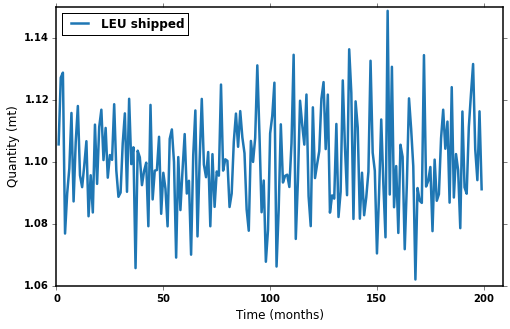

In [73]:
plt.plot(leu_time,leu_tp, label='LEU shipped', color=tableau20[i_leu])

plt.legend(loc='best')
plt.xlabel(xlab)
plt.ylabel(ylab_tp)
plt.xlim(t_min, t_max)

if ps == 1:
    savefig(plot_dir + pfix + 'leu_shipped_E5.png')


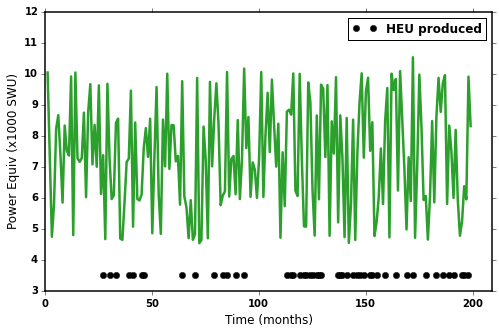

In [74]:
plt.plot(swu_time[1:],swu[1:], color=tableau20[i_heu])
plt.plot(heu_time,heu_tp*3500,  color='black', marker='o', linestyle='', label='HEU produced')
plt.legend(loc='best')

#plt.legend(loc='best')
plt.xlabel(xlab)
plt.ylabel(ylab_swu)
plt.xlim(t_min, t_max)
plt.ylim(3,12)

if ps == 1:
    savefig(plot_dir + pfix + 'EF_power_E5.png')


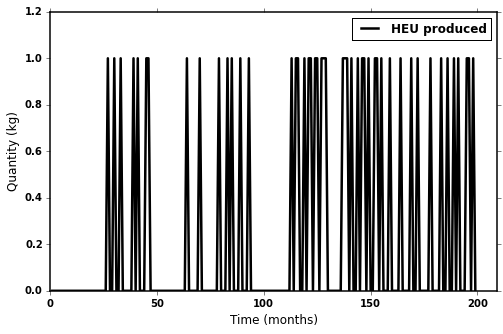

In [75]:
plt.plot(heu_time,heu_tp*1000, label='HEU produced', color= 'black')

plt.legend(loc='best')
plt.xlabel(xlab)
plt.ylabel('Quantity (kg)')
plt.xlim(t_min, t_max)

if ps == 1:
    savefig(plot_dir + pfix + 'heu_diverted_E5.png')


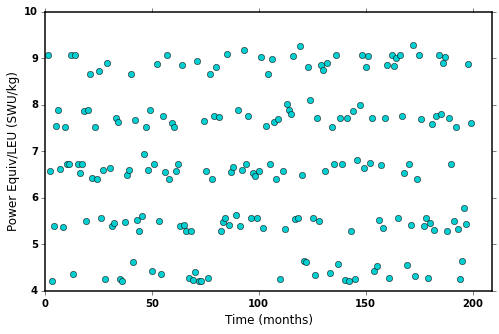

In [76]:
plt.plot(swu_time[1:],swu[1:]/leu_tp[1:], color='darkturquoise', marker='o', linestyle='')

plt.xlabel(xlab)
plt.ylabel('Power Equiv/LEU (SWU/kg)')
plt.xlim(t_min, t_max)

#plt.ylim([6,7])
if ps == 1:
    savefig(plot_dir + pfix + 'ratio_swu_leu.png')


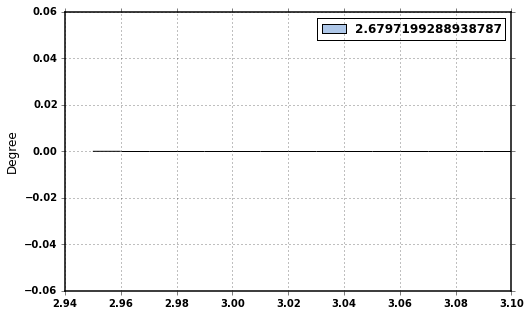

In [77]:
freq = 1
if freq == 1:
    freq_file = dir + 'SHIP_15_'+ pfix + sufx
    raw_freq = pd.read_csv(freq_file)
    precision=2

    bins=15
    hist_min=2.95
    hist_max=3.1
    m_hist = raw_freq.plot(kind='hist', bins=bins,color=tableau20[i_leu+1],
                  alpha=1.0,range=(hist_min,hist_max),normed=0,label='LEU Shipments')
    mean_delta = np.mean(raw_freq)
    variance_delta = np.var(raw_freq)
    sigma_delta = np.sqrt(variance_delta)
    x = np.linspace(hist_min,hist_max,100)
    #plt.ylim([6,7])
    if ps == 1:
        savefig(plot_dir + pfix + 'ship_hist_leu.png')


In [78]:
# Shipment data
from manip_data import ship_times
ship_qty = 0.003
t_ship,extra = ship_times(heu_file,ship_qty)
net_shipped = []

for i in range(len(t_ship)):
    net_shipped.append((i+1)*ship_qty)

In [79]:
from matplotlib import cm
from numpy import linspace

start = 0.0
stop = 1.0
number_of_lines= 100
#colors = [ cm.autumn_r(x) for x in linspace(start, stop, number_of_lines) ]
#colors = [ cm.YlOrRd(x) for x in linspace(start, stop, number_of_lines) ]
# Colormap scales from 0-1. Since my Swipe Fraction also scales 0-1, I can dispense with the general converter above
# But if I needed to use the above, it would be implemented as:
# plt.plot(insp_time[p],insp_y[p], marker='o', ms=20*swipe_frac[p], linestyle='', color=colors[int(swipe_frac[p]*100 - 1)])


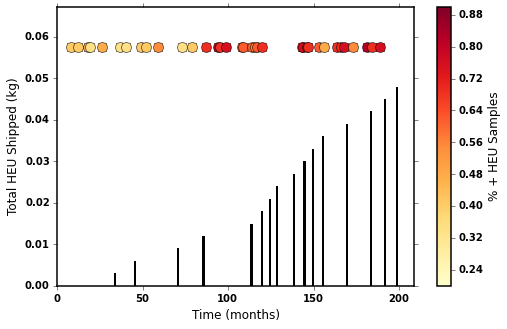

In [80]:
insp_y = insp_time*0. + (1.2*(max(net_shipped)))

plt.bar(t_ship, net_shipped, color= 'black')
plt.ylim(0, max(net_shipped)*1.4)    
plt.xlim(t_min, t_max)

zscale = swipe_frac
#zscale = zscale.astype(int) 

cm1 = plt.cm.get_cmap('YlOrRd')
sc = plt.scatter(insp_time,insp_y, c=zscale, cmap=cm1, s=0.1, color='orange')

for p in range(len(insp_time)):
#    lab = "_"
#    if p == 1: lab= "0.0"
#    if p == (len(insp_time) -1): lab = max(swipe_frac)
    plt.plot(insp_time[p],insp_y[p], marker='o', ms = 10, linestyle='', color=cm.YlOrRd(swipe_frac[p]))
#  ms=20*swipe_frac[p],

#plt.legend(loc='best')
plt.xlabel(xlab)
plt.ylabel("Total HEU Shipped (kg)")

cb = plt.colorbar(sc)
cb.ax.set_ylabel(swipe_label)
#plt.show()

if ps == 1:
    savefig(plot_dir + pfix + 'inspect_ship.png')
else:
    plt.show()
    

In [81]:
#TODO: Do I want dots to change size? Or add a legend?
# Then make more interesting datasets: No Falses, False + or - only, 
# and full effect with more times but random diversion


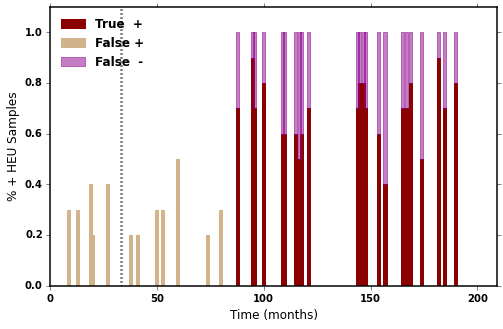

In [82]:
true_pos = swipe_frac - false_pos
width = 1.5
#plt.ylim(-1.1*max(false_pos), 1.1)    
plt.ylim(0, 1.1)    
plt.xlim(t_min, t_max)
plt.xlabel(xlab)
plt.ylabel(swipe_label)

# darkred, orchid, lightpink alpha=0.5
# firebrick, tan, mistyrose
col1 = 'darkred'
col2 = 'tan'
col3 = 'darkmagenta'
plt.bar(insp_time, true_pos, width, color = col1, edgecolor = col1, label = "True  +")
plt.bar(insp_time, false_pos, width, color = col2, edgecolor = col2, label = "False +")
plt.bar(insp_time, false_neg,  width, color = col3, edgecolor = col3, alpha=0.5,  
        label = "False  -", bottom=true_pos)
#plt.plot([0,max(heu_time)*1.5],[0,0], color='black')

heu_start = min(t_ship)
plt.plot([heu_start,heu_start],[0, 1.1], color='black', linestyle=':')
plt.legend(loc='best',frameon=False)

if ps == 1:
    savefig(plot_dir + pfix + 'swipe_rates.png')
else:
    plt.show()
